In [1]:
with open('train_pos.txt','r') as infile:
  train_pos_reviews = infile.readlines()

with open('train_neg.txt','r') as infile:
  train_neg_reviews = infile.readlines()

with open('test_pos.txt','r') as infile:
  test_pos_reviews = infile.readlines()

with open('test_neg.txt','r') as infile:
  test_neg_reviews = infile.readlines()

In [2]:
import re

train_pos_reviews = [re.sub(r"([\.\",\(\)!\?;:])", " \\1 ", review.lower().replace('\n','').replace('<br />', ' ')) for review in train_pos_reviews]
train_neg_reviews = [re.sub(r"([\.\",\(\)!\?;:])", " \\1 ", review.lower().replace('\n','').replace('<br />', ' ')) for review in train_neg_reviews]
test_pos_reviews = [re.sub(r"([\.\",\(\)!\?;:])", " \\1 ", review.lower().replace('\n','').replace('<br />', ' ')) for review in test_pos_reviews]
test_neg_reviews = [re.sub(r"([\.\",\(\)!\?;:])", " \\1 ", review.lower().replace('\n','').replace('<br />', ' ')) for review in test_neg_reviews]

In [4]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import string

stops = list(ENGLISH_STOP_WORDS) + list(string.punctuation)

In [5]:
train_pos_words = [review.split() for review in train_pos_reviews]
train_neg_words = [review.split() for review in train_neg_reviews]

train_pos_cleaned_words = [[w for w in words if w not in stops] for words in train_pos_words]
train_pos_cleaned_counts = [len(words) for words in train_pos_cleaned_words]

train_neg_cleaned_words = [[w for w in words if w not in stops] for words in train_neg_words]
train_neg_cleaned_counts = [len(words) for words in train_neg_cleaned_words]

In [7]:
import numpy as np

min(train_pos_cleaned_counts), max(train_pos_cleaned_counts), np.mean(train_pos_cleaned_counts), np.std(train_pos_cleaned_counts)

(6, 1318, 111.74384, 87.03024383543)

In [8]:
min(train_neg_cleaned_counts), max(train_neg_cleaned_counts), np.mean(train_neg_cleaned_counts), np.std(train_neg_cleaned_counts)

(4, 714, 107.66968, 79.14813711451205)

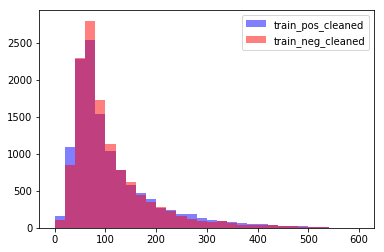

In [9]:
import matplotlib.pyplot as plt

plt.hist(train_pos_cleaned_counts, range=[0,600], bins=30, alpha=0.5, label='train_pos_cleaned', color='b')

plt.hist(train_neg_cleaned_counts, range=[0,600], bins=30, alpha=0.5, label='train_neg_cleaned', color='r')

plt.legend(loc='upper right')

plt.show()

In [ ]:
# The average size of reviews is around 110 for both positive and negtive ones. Variations or distributions of review sizes are pretty close.

# In general people tend to write pretty descriptive reviews for movies and as such this is a good topic for sentimental analysis.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def sorted_words(corpus):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  return sorted(words_freq, key = lambda x: x[1], reverse=True)


top_num = 20

train_pos_top = sorted_words(train_pos_reviews)[:top_num]
train_neg_top = sorted_words(train_neg_reviews)[:top_num]

train_pos_top_words = [t[0] for t in train_pos_top]
train_pos_top_freqs = [t[1] for t in train_pos_top]
train_pos_top_indexes = np.arange(len(train_pos_top_words))

train_neg_top_words = [t[0] for t in train_neg_top]
train_neg_top_freqs = [t[1] for t in train_neg_top]
train_neg_top_indexes = np.arange(len(train_neg_top_words))

bar_width = 0.35

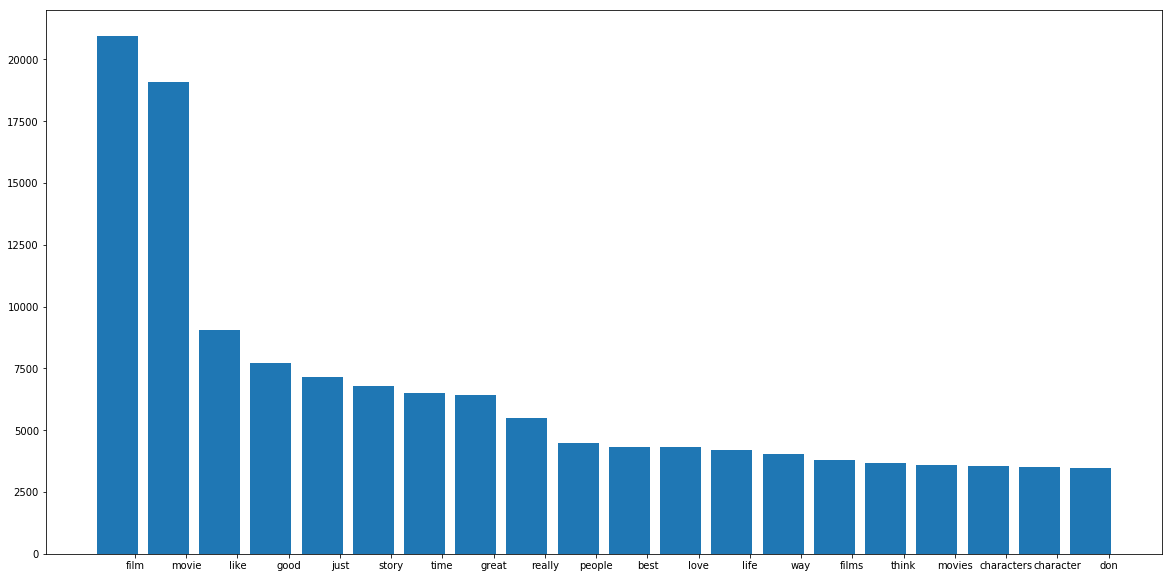

In [12]:
plt.figure(figsize=(20,10))
plt.bar(train_pos_top_indexes, train_pos_top_freqs)
plt.xticks(train_pos_top_indexes + bar_width, train_pos_top_words)
plt.show()

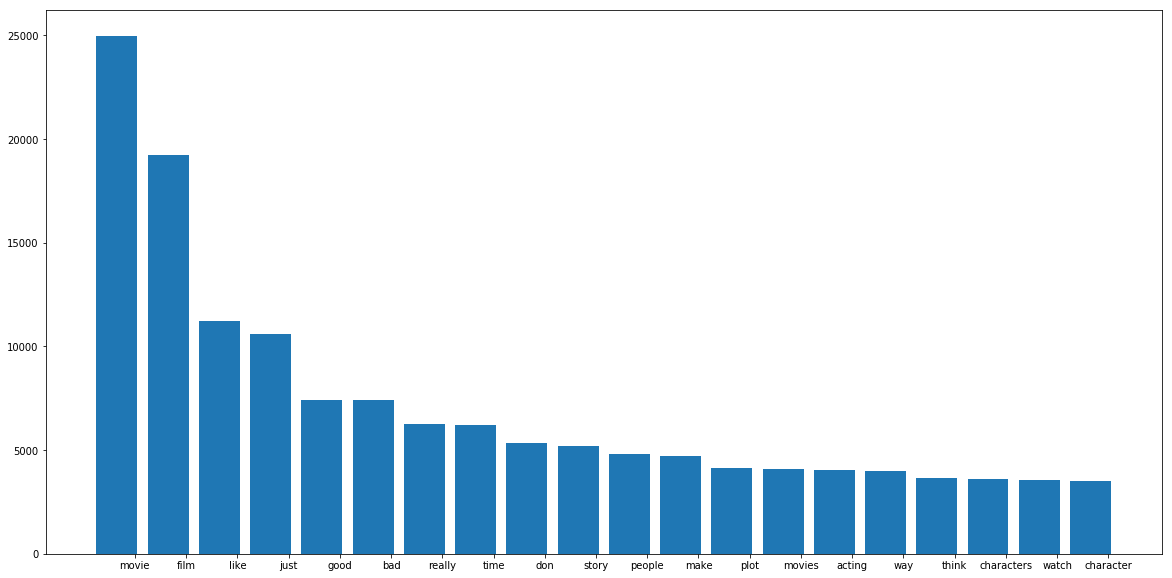

In [13]:
plt.figure(figsize=(20,10))
plt.bar(train_neg_top_indexes, train_neg_top_freqs)
plt.xticks(train_neg_top_indexes + bar_width, train_neg_top_words)
plt.show()

In [ ]:
# “Bag of Words” is not a very good model for doing sentiment analysis of reviews because similar words have high counts in both positive and negative reviews.

# This realization prompts me to move to other methods of feature extraction like n-gram modelling and TF-IDF counts of each words.